# Sentiment analysis of women's clothes reviews

## Part 2: Sentiment analysis with Machine Learning models.

The aim of this project is sentiment analysis to determined whether the product is recommended or not based on a review as an input text. I hace used different machine learning algorithms to get more accurate predictions such as: Logistic Regression, Naive Bayes, Stochastic Gradient Descent, Random Forest and Ada Boosting as well. To analysis I have used Python and their libraries: pandas, matplotlib, NLTK and scikit-learn.

The text classification relies to assigned documents into one or many categories. One of the most useful text classification is Sentiment analysis. Is aimed to determine the user's point of view about given product, topic or service. The reviews of products users play a very important role in the e-commerce industry. The product quality can be measured by review given by customer. A new client can decided whether it buy or not given product based on previously reviews.

### Dataset

The dataset comes from Woman Clothing Review that can be find at Kaggle. For this project I only used two variables: Review and Recommended.

Attributes:

- Review Text - customer review body.
- Recommended IND -  product customer recommendation  where 1 is recommended, 0 is not recommended. 

## Import libriaries and data

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import string
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import pickle

import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('C:\Python Scripts\Datasets\Womens Clothing Reviews.csv', header=0,index_col=0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


**First observations**:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


Shape of data:

In [5]:
df.shape

(23486, 10)

Type of variables:

In [6]:
df.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

Checking the missing values in data:

In [7]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Example of review text:

In [8]:
df['Review Text'][1]

'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

## Data cleaning

The dataset contains several variables such as Age, Title, Ratiing, Positive Feedback Count, Division Name, Department Name and Class name. In this case I have used only two variables Review Text and Recommended IND as a predictor and target class variable.

**Review Text** is a review from customers and will be used as predictor variable.

**Recommended** is a recommendation from customers, where the product  1 is recommended, 0 is not recommended and  will be used as target variable.

In [10]:
data = df[['Review Text', 'Recommended IND']]
data.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


Rename columns:

In [11]:
data = review.rename(columns={"Recommended IND": "Class", "Review Text": "Review"})
data.head()

,Review,Class
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


Delate missing values:

In [12]:
data.dropna(subset=['Review'], inplace=True)

In [13]:
data.isnull().sum()

Review    0
Class     0
dtype: int64

In [14]:
data['Review'] = data['Review'].astype(str)

In [15]:
data.shape

(22641, 2)

## Basic data analysis

Checking Proportion Target Class Variable:

In [16]:
data['Class'].value_counts()

1    18540
0     4101
Name: Class, dtype: int64

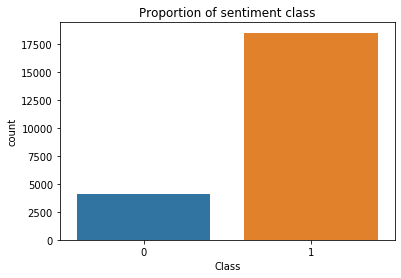

In [17]:
sns.countplot(x='Class',data=data)
plt.xlabel('Class')
plt.title('Proportion of sentiment class');

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

Length of review text:

In [18]:
data['length'] = data['Review'].apply(len)
data.head()

,Review,Class,length
0,Absolutely wonderful - silky and sexy and comf...,1,53
1,Love this dress! it's sooo pretty. i happene...,1,303
2,I had such high hopes for this dress and reall...,0,500
3,"I love, love, love this jumpsuit. it's fun, fl...",1,124
4,This shirt is very flattering to all due to th...,1,192


Histogram of reviews length:

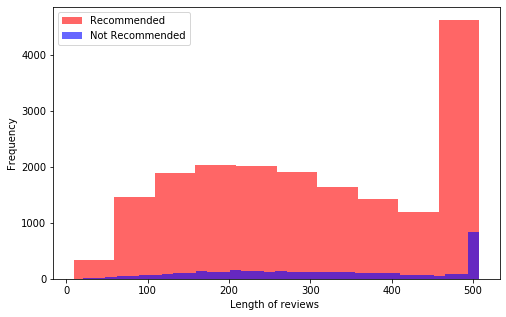

In [19]:
plt.figure(figsize=(8, 5))
data[data.Class == 1].length.plot(kind='hist', color='red', label='Recommended', alpha=0.6)
data[data.Class == 0].length.plot(bins=35, kind='hist', color='blue', label='Not Recommended', alpha=0.6)
plt.legend()
plt.xlabel("Length of reviews ");

The largest reviews has over 500 characters, some of them are very short.

##  Text Mining

In this part I changed text to tokens and convertion all of the words to lower case. Then I removed punctuation, bad characters, numbers and stop words. The next step is aimed to normalization them throught the Lemmatization method. 

The function to remove punctuation and change to **tokens**:

In [20]:
def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()                   
    return " ".join(text)

#### Stop words

First I extracting the stopwords from nltk library then adding some clothing stopwords and build function to remove stop words:

In [21]:
# Show some stop words
stop_words = stopwords.words('english')
print(stop_words[::10])

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


In [22]:
#clothing stopwords
clothes =['dress','color','wear','top','sweater','material','shirt','jeans','pant',
          'skirt','order','white','black','fabric','blouse','sleeve','even', 'jacket']

In [23]:
def stopwords(review):
    text = [word.lower() for word in review.split() if word.lower() not in stop_words and word.lower() not in clothes]
    return " ".join(text)

**Removing all numbers (weight, size etc.)**

I remove numbers from text, since numbers doesn't give much importance to get the main words:

In [27]:
def remove_numbers(text):
    new_text = []
    for word in text.split():
        if not re.search('\d', word):
            new_text.append(word)
    return ' '.join(new_text)        

**Normalization**

The next step is the normalization of words in the corpus by transform all of different forms of the word into one. There are two methods for this purpose: Stemming and Lemmatization. I have used the Lemmatization one.

In [29]:
lem = WordNetLemmatizer()

def lemmatize(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

Apply all functions to data:

In [30]:
data['Review'] = data['Review'].apply(tokens)
data['Review'] = data['Review'].apply(stopwords)
data['Review'] = data['Review'].apply(remove_numbers)
data['Review'] = data['Review'].apply(lemmatize)

In [31]:
data.head()

,Review,Class,length
0,absolutely wonderful silky sexy comfortable,1,53
1,love sooo pretty happened find store glad bc n...,1,303
2,high hope really wanted work initially ordered...,0,500
3,love love love jumpsuit fun flirty fabulous ev...,1,124
4,flattering due adjustable front tie perfect le...,1,192


In [32]:
data['Review'][1]

'love sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite'

### WordCloud - Repetition of words

Word cloud is a excellent way to represent text data, where the size and color of each word appears in the wordcloud show its frequency or importance. 

I have created a Word Clouds for reviews, representing most common words in each target class. 

In [34]:
positive = data[data.Class==1]
negative = data[data.Class==0]
positive.head()

,Review,Class,length
0,absolutely wonderful silky sexy comfortable,1,53
1,love sooo pretty happened find store glad bc n...,1,303
3,love love love jumpsuit fun flirty fabulous ev...,1,124
4,flattering due adjustable front tie perfect le...,1,192
6,aded basket hte last mintue see would look lik...,1,496


In [35]:
negative.head()

,Review,Class,length
2,high hope really wanted work initially ordered...,0,500
5,love tracy reese dress one petite foot tall us...,0,488
10,run small esp zipper area run ordered sp typic...,0,336
22,first pullover styling side zipper purchased k...,0,437
25,loved didnt really look long purchased large m...,0,340


In [37]:
positive_words=[]

for review in positive.Review:
    positive_words.append(review) 
positive_words = ' '.join(positive_words)
positive_words[:48]

'absolutely wonderful silky sexy comfortable love'

In [38]:
negative_words =[]

for review in negative.Review:
    negative_words.append(review)
negative_words = ' '.join(negative_words)
negative_words[:455]

'high hope really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one petite foot tall usually p brand pretty package lot long full overwhelmed small frame stranger alteration shortening narrowing would tak'

**Most Common words in Recommended Review**

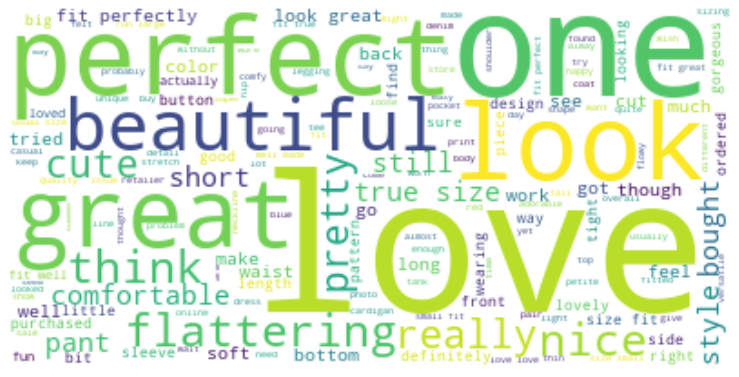

In [39]:
wordcloud = WordCloud(background_color="white", max_words=len(positive_words))

wordcloud.generate(positive_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Most Common words in not Recommended Review**

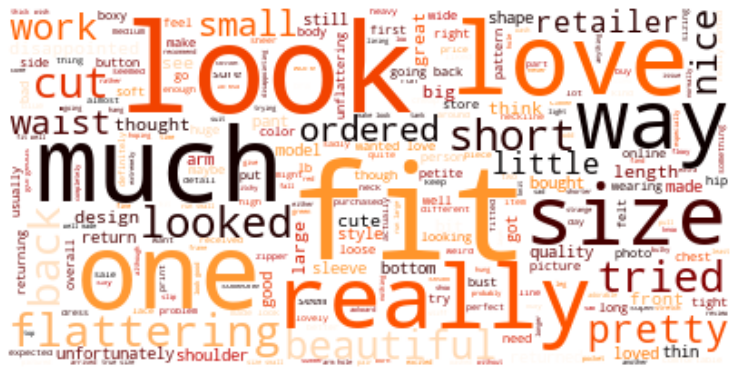

In [35]:
wordcloud = WordCloud(background_color="white", max_words=len(negative_words), colormap='gist_heat')

wordcloud.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Data preparation

Spliting data into train and test set;

In [41]:
X = data['Review']
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

## Build models

I have used the following classification models:
- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting.

To run machine learning algorithms need to convert the text files into numerical feature vectors. I have used bag of words model for modelling. This model convert the text documents to a matrix of token counts (CountVectorizer), then transform a count matrix to a normalized TF-IDF representation (tf-idf transformer). 

**SMOTE**

The target class variable is imbalanced where "Recommended" values are more dominating then "Not Recommendation". The simplest way to improve imbalanced dataset is balancing them by oversampling instances of the minority class or undersampling instances of the majority class. To balancing classes I have used one of the advanced techniques like the SMOTE (Synthetic Minority Over-sampling Technique).

The goal of the SMOTE method is to balance class distribution by randomly increasing minority class examples by replicating them.

**Pipeline**

To make the vectorizer => transformer => SMOTE  => classifier easier to work with I have used Pipeline class in scikit-learn.

**Model Evaluation**

To evaluate the models I have used accuracy score and classification report(precision, recall, F1-score).

Accuracy is one of the most common classification evaluation metric, i.e. the number of correct predictions made as a ratio of total predictions. 

#### 1. Logistic regression

In [42]:
model_log = imbpipeline(steps=[('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                               ('tfidf', TfidfTransformer()),
                               ('smote', SMOTE()),
                               ('clf', LogisticRegression())]) 

model_log.fit(X_train, y_train)

ytest = np.array(y_test)
predictions = model_log.predict(X_test)

In [43]:
print('accuracy %s' % accuracy_score(predictions, y_test))
print(classification_report(ytest, predictions))

accuracy 0.8867691220632397
              precision    recall  f1-score   support

           0       0.67      0.79      0.73      1082
           1       0.95      0.91      0.93      4579

    accuracy                           0.89      5661
   macro avg       0.81      0.85      0.83      5661
weighted avg       0.90      0.89      0.89      5661



#### 2. Naive Bayes 

In [44]:
model_nb = imbpipeline(steps=[('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                              ('tfidf', TfidfTransformer()),
                               ('smote', SMOTE()),
                               ('clf', MultinomialNB())]) 

model_nb.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = model_nb.predict(X_test)

In [45]:
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.869281045751634
              precision    recall  f1-score   support

           0       0.62      0.84      0.71      1082
           1       0.96      0.88      0.92      4579

    accuracy                           0.87      5661
   macro avg       0.79      0.86      0.81      5661
weighted avg       0.89      0.87      0.88      5661



#### 3. Stochastic Gradient Descent

In [46]:
model_sg = imbpipeline(steps=[('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                              ('tfidf', TfidfTransformer()),
                              ('smote', SMOTE()),
                              ('clf',  SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42))]) 


model_sg.fit(X_train, y_train)

ytest = np.array(y_test)
y_predict = model_sg.predict(X_test)

In [47]:
print('accuracy %s' % accuracy_score(y_predict, y_test))
print(classification_report(ytest, y_predict))

accuracy 0.8622151563328034
              precision    recall  f1-score   support

           0       0.60      0.83      0.70      1082
           1       0.95      0.87      0.91      4579

    accuracy                           0.86      5661
   macro avg       0.78      0.85      0.80      5661
weighted avg       0.89      0.86      0.87      5661



#### 4. Random Forest

In [48]:
model_rf = imbpipeline(steps=[('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                              ('tfidf', TfidfTransformer()),
                              ('smote', SMOTE()),
                              ('clf',  RandomForestClassifier(n_estimators=50))]) 


model_rf.fit(X_train, y_train)

ytest = np.array(y_test)
pred = model_rf.predict(X_test)

In [49]:
print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(ytest, pred))

accuracy 0.869987634693517
              precision    recall  f1-score   support

           0       0.73      0.51      0.60      1082
           1       0.89      0.96      0.92      4579

    accuracy                           0.87      5661
   macro avg       0.81      0.73      0.76      5661
weighted avg       0.86      0.87      0.86      5661



#### 5. Ada  Boosting

In [50]:
ada = imbpipeline(steps=[('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                         ('tfidf', TfidfTransformer()),
                         ('smote', SMOTE()),
                         ('clf',  AdaBoostClassifier())]) 


ada.fit(X_train, y_train)

ytest = np.array(y_test)
ada_pred = ada.predict(X_test)

In [51]:
print('accuracy %s' % accuracy_score(ada_pred, y_test))
print(classification_report(ytest, ada_pred))

accuracy 0.839957604663487
              precision    recall  f1-score   support

           0       0.58      0.61      0.59      1082
           1       0.91      0.90      0.90      4579

    accuracy                           0.84      5661
   macro avg       0.74      0.75      0.75      5661
weighted avg       0.84      0.84      0.84      5661



The function to build and calculates all models by using a pipeline as follows:

In [62]:
def calculate_models(X_train, X_test, y_train, y_test):
    ''' Calculating models with score '''
    models = pd.DataFrame()
    classifiers = [
        LogisticRegression(),
        MultinomialNB(),
        SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42),
        RandomForestClassifier(n_estimators=50),
        AdaBoostClassifier(),]

    for classifier in classifiers:
        pipeline = imbpipeline(steps=[('vect', CountVectorizer(
                                min_df=5, ngram_range=(1, 2))),
                                      ('tfidf', TfidfTransformer()),
                                      ('smote', SMOTE()),
                                      ('classifier', classifier)])
        pipeline.fit(X_train, y_train)
        score = pipeline.score(X_test, y_test)
        param_dict = {
                      'Model': classifier.__class__.__name__,
                      'Score': score
                     }
        models = models.append(pd.DataFrame(param_dict, index=[0]))

    models.reset_index(drop=True, inplace=True)
    print(models.sort_values(by='Score', ascending=False))

In [63]:
calculate_models(X_train, X_test, y_train, y_test)

                    Model     Score
0      LogisticRegression  0.887122
3  RandomForestClassifier  0.871577
1           MultinomialNB  0.868221
2           SGDClassifier  0.864335
4      AdaBoostClassifier  0.838014


### Best model

I have tested five different models and check which one is the best:

In [55]:
log_acc = accuracy_score(predictions, y_test)
nb_acc = accuracy_score(pred_y, y_test)
sg_acc = accuracy_score(y_predict, y_test)
rf_acc = accuracy_score(pred, y_test)
ada_acc = accuracy_score(ada_pred, y_test)

In [61]:
models = pd.DataFrame({
                      'Model': ['Logistic Regression', 'Naive Bayes', 'Stochastic Gradient Descent', 'Random Forest', 'AdaBoosting'],
                      'Score': [log_acc, nb_acc, sg_acc, rf_acc, ada_acc]})
print(round(models.sort_values(by='Score', ascending=False), 2))

                         Model  Score
0          Logistic Regression   0.89
3                Random Forest   0.87
1                  Naive Bayes   0.87
2  Stochastic Gradient Descent   0.86
4                  AdaBoosting   0.84


From above analysis one can see that the best model is Logistic Regression with accuracy score of 89%. This model has achaived the best result and this is signalling the characteristics of a reasonably good model with comparision to others ones.

In [66]:
# Save the best model
with open("sentiment_model.pkl", "wb") as model_file:
    pickle.dump(model_log, model_file)

## Summary

This project was aimed to used sentiment analysis to determined product recommendation. I have started with the data engineering and text mining, which cover change text into tokens, remove punctuation, numbers, stop words and normalization them by using lemmatization. Following I have used bag of words model to convert the text into numerical feature vectors. To resolve the imbalance problem in the data I have used SMOTE method. Finally I started training 5 different classification models and got the best accuracy of 89 % for Logistic Regression model.